In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
import glob

res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'

sum_df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,sum_glob_pattern ))
] )
df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,res_glob_pattern ))
] )



In [8]:
sum_df.shape

In [9]:
sum_df.nsmallest(columns='error', n=10)

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,r0_h,b_p,b_h,run_id,status,h_err,p_err,error,logerror,message
926,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse4_Vmax^IN_h_18_h-65777870851600903,0,427.406173,165.788707,593.194880,6.385523,NaN
546,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse4_K^IN_p_20_h5550858566262168568,0,443.136437,152.564197,595.700634,6.389738,NaN
62,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse4_K^IN_h_9_h-907144952032095112,0,443.903668,152.199163,596.102831,6.390413,NaN
103,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_2_h4895258542848259320,0,425.379163,174.527918,599.907081,6.396775,NaN
480,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_Vmax^IN_h_1_h-7513917998685876004,0,418.814692,185.051998,603.866691,6.403353,NaN
540,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse4_K^IN_p_21_h102449767300855603,0,418.612337,187.199860,605.812198,6.406570,NaN
54,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse4_K^IN_h_8_h-315165028178013400,0,421.410688,186.733348,608.144036,6.410412,NaN
905,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_27_h8303337785735256703,0,329.516562,288.502729,618.019290,6.426520,NaN
167,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse3_K^IN_p_28_h6408706487068416639,0,326.025796,291.998155,618.023951,6.426527,NaN
695,0,0.000001,0.000001,0.8,0.8,6.625,6.625,0.000001,0.0,0.0,...,0.000002,0.01,0.01,pse4_K^IN_p_29_h3693672357872282070,0,322.585725,295.731667,618.317392,6.427002,NaN


In [10]:
df.head()

,Unnamed: 0,Bp,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,Treleasep,Tbreakdownh,respirationp,respirationh,dic_uptake,Bp[C],Bh[C],Sp[C],Sh[C],run_id
0,0,1.100000,44.000000,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.000000,...,4.924842e-06,0.000000e+00,4.114253e-06,0.000296,-1.040834e-16,7.287500,291.500000,0.000000,0.000000,de3_h988500760779878899
1,1,2.291407,92.364102,0.056253,7.250989,0.299429,0.561021,48.037805,2958.105495,0.001834,...,1.025892e-05,1.027723e-05,5.078128e-06,0.000200,8.029780e-04,15.180568,611.912178,47.412283,368.888271,de3_h988500760779878899
2,2,0.249406,39.539821,0.058797,9.452356,0.542746,0.111767,62.621858,2999.854579,0.000465,...,1.116621e-06,1.117049e-06,5.761278e-07,0.000085,2.787240e-06,1.652312,261.951315,56.110236,707.466553,de3_h988500760779878899
3,3,0.149708,22.218548,0.060492,10.008968,0.633739,0.118090,66.309414,3000.316664,0.000496,...,6.702643e-07,6.692805e-07,3.506569e-07,0.000048,-6.069387e-06,0.991819,147.197880,57.746196,816.942912,de3_h988500760779878899
4,4,0.084033,12.902418,0.059568,10.312993,0.581670,0.114798,68.323577,3000.093192,0.000480,...,3.762272e-07,3.761335e-07,1.952911e-07,0.000028,-1.786179e-06,0.556720,85.478518,58.641450,876.539033,de3_h988500760779878899


In [11]:
df.columns

Index(['Unnamed: 0', 'Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',
       'ROS', 'Sp', 'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp',
       'limOCp', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]', 'run_id'],
      dtype='object')

In [12]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [13]:
neg_ids = mdf.loc[mdf.value<0, 'run_id']
mdf = mdf.loc[~mdf.run_id.isin(neg_ids)]
df = df.loc[~df.run_id.isin(neg_ids)]
sum_df = sum_df.loc[~sum_df.run_id.isin(neg_ids)]


In [14]:
neg_ids.unique().shape

In [15]:
list(neg_ids.unique())

['se4_38077_h-7614982603683219253',
 'de4_h-3848670529325342380',
 'de4_h5941456068610789377',
 'de4_h606308885574819623',
 'de4_h-6819123482926816199',
 'de4_h6302348144231505736',
 'de4_h1721067672837716449',
 'de4_h-5507649708020802717',
 'de4_h-8716240579032513258',
 'de4_h-2771102933577048120',
 'de4_h-7170859727220645165',
 'de4_h5550258854167029524',
 'de4_h-3401400459551112239',
 'de4_h7426933736805689660',
 'de4_h1093236031804800518',
 'de4_h1167241485870665994',
 'de4_h2633508666804687306',
 'de4_h-576132043226124993',
 'de4_h-2764582615168923444',
 'de4_h909761487528005224',
 'se4_60732_h-1158323781161521178',
 'se4_42213_h-3230479352404265276',
 'se4_29365_h-7450362615823993572',
 'se4_49438_h5035012292989171777',
 'se4_37355_h1580862549063289413',
 'se4_42053_h555370396582424532',
 'se4_16279_h6121723879765728091',
 'se4_54221_h-4308515771745820777',
 'se4_13115_h-4776293954833594231',
 'se4_62608_h4306429866661874283',
 'se4_42194_h-1797310077409365610',
 'se4_35528_h4515

C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

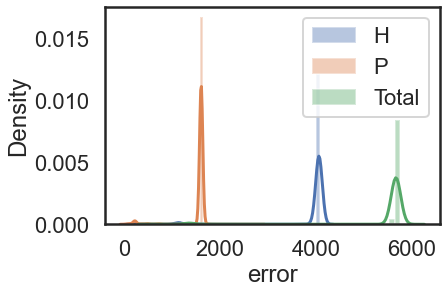

In [16]:
sns.distplot(sum_df.h_err, label='H')
sns.distplot(sum_df.p_err, label='P')
sns.distplot(sum_df.error, label='Total')
plt.legend()


In [17]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

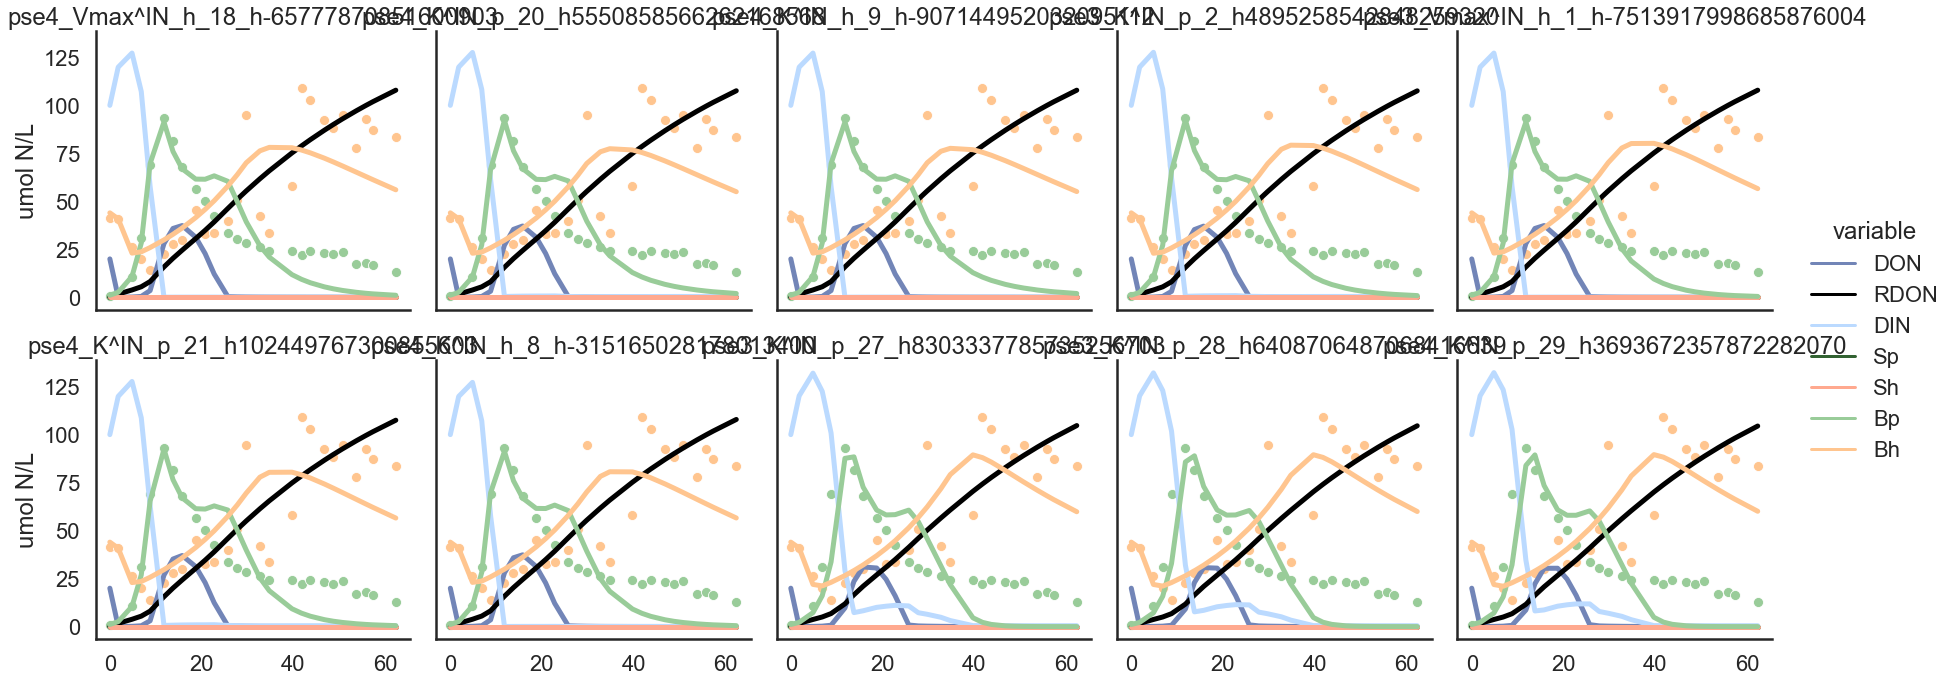

In [18]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [19]:
lowest_ids


926     pse4_Vmax^IN_h_18_h-65777870851600903
546       pse4_K^IN_p_20_h5550858566262168568
62         pse4_K^IN_h_9_h-907144952032095112
103        pse3_K^IN_p_2_h4895258542848259320
480    pse3_Vmax^IN_h_1_h-7513917998685876004
540        pse4_K^IN_p_21_h102449767300855603
54         pse4_K^IN_h_8_h-315165028178013400
905       pse3_K^IN_p_27_h8303337785735256703
167       pse3_K^IN_p_28_h6408706487068416639
695       pse4_K^IN_p_29_h3693672357872282070
Name: run_id, dtype: object

In [20]:
sum_df.nlargest(10, 'error', )

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,r0_h,b_p,b_h,run_id,status,h_err,p_err,error,logerror,message
36725,0,5.408393e-06,1.576742e-06,0.168457,0.127441,6.625,6.625,0.000009,0.000005,7.664998e-06,...,0.000002,0.01,0.01,se4_22492_h-4054744203220439345,0,4067.143865,1892.366574,5959.510439,8.692744,NaN
24645,0,6.990786e-06,5.159731e-06,0.940918,0.044434,6.625,6.625,0.000003,0.000004,6.128947e-06,...,0.000002,0.01,0.01,se4_42315_h8208297391835330203,0,4066.095963,1828.040586,5894.136549,8.681713,NaN
28523,0,7.171631e-06,8.595785e-06,0.675293,0.497559,6.625,6.625,0.000006,0.000003,1.068115e-07,...,0.000002,0.01,0.01,se4_40334_h1468753475733645574,0,4052.512079,1804.462458,5856.974537,8.675388,NaN
451,0,5.416317e-07,6.204500e-07,0.020690,0.241195,6.625,6.625,0.000002,0.000004,5.548565e-06,...,0.000002,0.01,0.01,de4_h-3509477038931039937,0,4064.873033,1786.058013,5850.931047,8.674356,NaN
22373,0,5.600541e-06,1.994945e-06,0.413574,0.372559,6.625,6.625,0.000002,0.000010,8.188883e-07,...,0.000002,0.01,0.01,se4_52419_h-3556361071900601603,0,4059.165110,1782.750005,5841.915115,8.672814,NaN
1715,0,5.408393e-06,4.786739e-06,0.168457,0.127441,6.625,6.625,0.000009,0.000005,7.664998e-06,...,0.000002,0.01,0.01,se4_22475_h2828426221531395098,0,4067.117601,1772.431607,5839.549208,8.672409,NaN
1204,0,5.408393e-06,1.576742e-06,0.168457,0.127441,6.625,6.625,0.000009,0.000005,7.664998e-06,...,0.000002,0.01,0.01,se4_22481_h4061065083575781103,0,4069.912160,1765.246902,5835.159061,8.671657,NaN
27214,0,2.390544e-06,5.645752e-06,0.711426,0.625488,6.625,6.625,0.000006,0.000003,4.206340e-06,...,0.000002,0.01,0.01,se4_31025_h-2771605769780472582,0,4062.418701,1770.915373,5833.334074,8.671344,NaN
29287,0,5.408393e-06,1.576742e-06,0.168457,0.127441,6.625,6.625,0.000009,0.000005,7.664998e-06,...,0.000002,0.01,0.01,se4_22505_h6387613760050878456,0,4067.194728,1760.801423,5827.996151,8.670429,NaN
9420,0,9.437844e-07,9.986030e-06,0.836426,0.500488,6.625,6.625,0.000007,0.000002,8.112590e-06,...,0.000002,0.01,0.01,se4_31505_h3335121327740251714,0,4068.960386,1746.304759,5815.265145,8.668242,NaN


In [21]:
sum_df.nsmallest(columns='error', n=1).T

,926
Unnamed: 0,0
M_h,0.000001
M_p,0.000001
gamma^D_p,0.8
gamma^D_h,0.8
R_p,6.625
R_h,6.625
E^O_p,0.000001
E^I_p,0.0
E^O_h,0.0


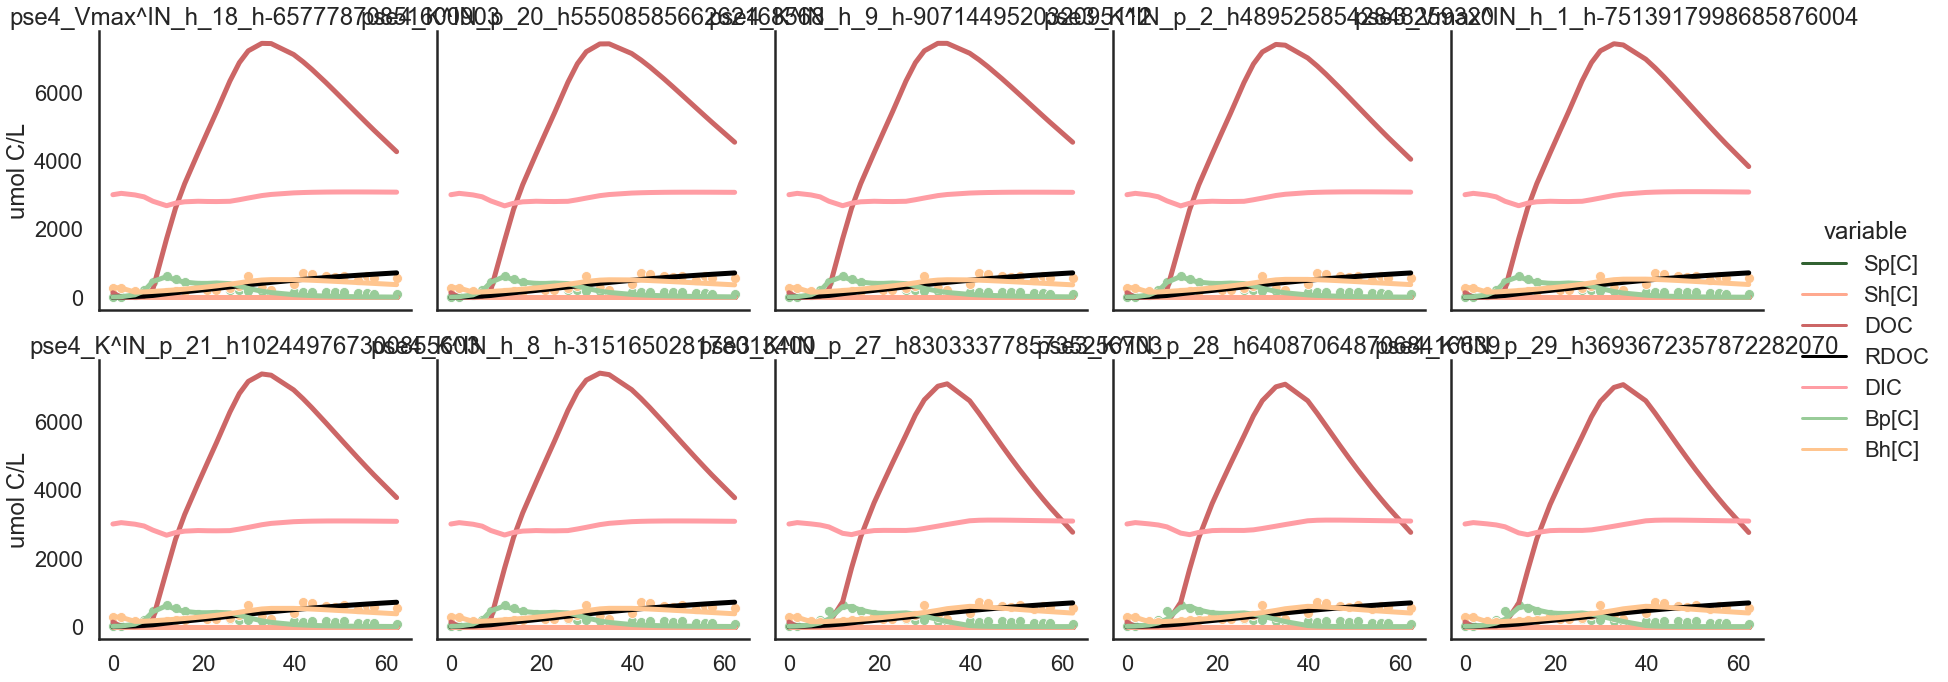

In [22]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol C/L')
g.set_titles(col_template='{col_name}',)



In [23]:
df.shape

In [24]:
import hdbscan


In [25]:
import umap

In [26]:
mdf.day.unique()

array([ 0.        ,  1.82083333,  4.83263889,  6.85347222,  8.77916667,
       11.80347222, 13.77083333, 15.77430556, 18.71527778, 20.77777778,
       22.75347222, 25.72013889, 27.79444444, 29.74791667, 32.72152778,
       34.77152778, 39.71388889, 41.79097222, 43.71736111, 46.77638889,
       48.74652778, 50.74027778, 53.76388889, 55.80069444, 57.35138889,
       62.35138889])

In [27]:
sample_cols_umap = ['Bp', 'Bh', 'DON', 'DIN', 'RDON', 'DOC', 'DIC', 'RDOC']
sample_cols_HDBSCAN = ['Bp', 'Bh',]

sample_days = [ 5, 12, 16, 19, 42, 62]
#sample_days_2 = [ 5, 12, 16, 20, 42, 60]




In [28]:
tdf = mdf.loc[mdf.day.round(0).isin(sample_days) & mdf.variable.isin(sample_cols_umap)]
tdf['day0'] = tdf.day.round(0)
Xu = tdf.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
tdf2 = mdf.loc[mdf.day.round(0).isin(sample_days) & mdf.variable.isin(sample_cols_HDBSCAN)]
tdf2['day0'] = tdf2.day.round(0)
Xh = tdf2.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(Xu)

In [31]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [32]:
udf['run_id'] = Xu.index

In [33]:
udf = pd.merge(udf, sum_df, on='run_id', how='left')

In [34]:
udf['logerror'] = np.log(udf['error'])

In [35]:
udf['type'] = udf.run_id.str.replace('_.*','', regex=True)

<AxesSubplot:>

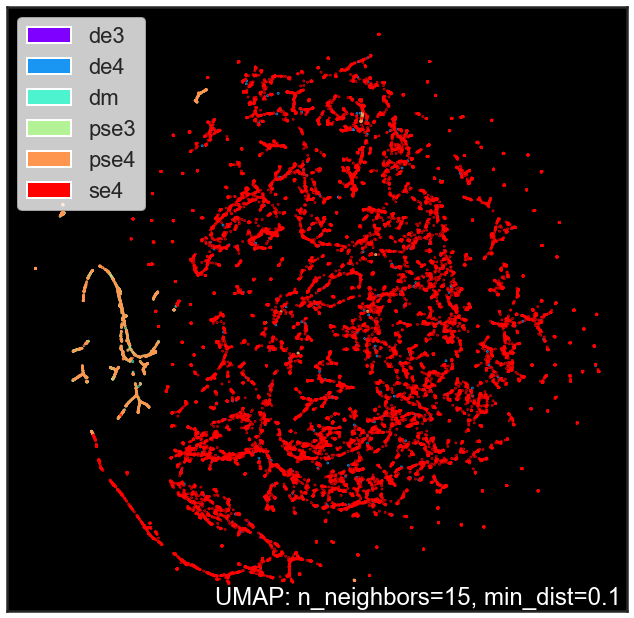

In [36]:
import umap.plot
umap.plot.points(reducer, labels=udf['type'], theme='fire')

<AxesSubplot:>

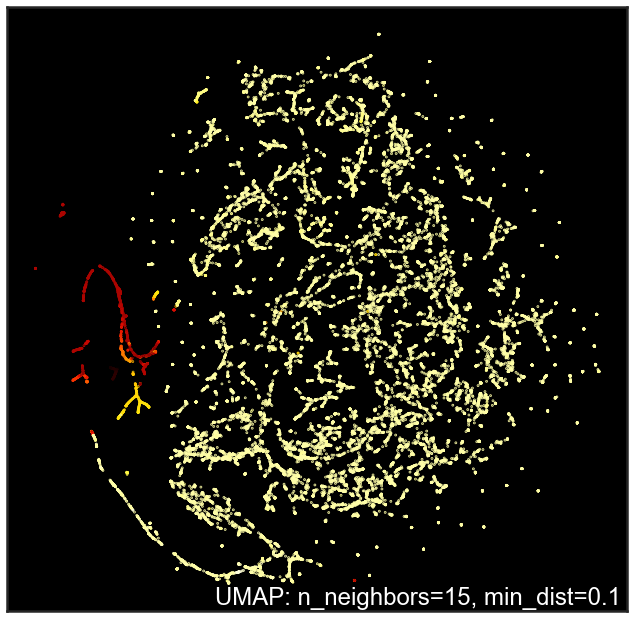

In [37]:
import umap.plot
umap.plot.points(reducer, values=udf['logerror'], theme='fire')

In [38]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=200, 
    min_samples=10, 
    core_dist_n_jobs=1, 
    cluster_selection_epsilon = 10.0,
    #cluster_selection_method='leaf'
)
clusterer.fit(Xu)


HDBSCAN(cluster_selection_epsilon=10.0, core_dist_n_jobs=1,
        min_cluster_size=200, min_samples=10)

In [39]:
clusterer.labels_

array([-1, -1, -1, ...,  3,  3,  3], dtype=int64)

In [40]:
clusterer.labels_.max()

3

In [41]:
(clusterer.labels_ < 0).sum()

1404

In [42]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([ 1404,   243,  1181,   290, 35539], dtype=int64))

In [43]:
udf.shape

In [44]:
udf['cluster'] = clusterer.labels_

In [45]:
clusterer2 = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=10, 
    core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 0.01,
    #cluster_selection_method='leaf'
)
clusterer2.fit(Xu.loc[Xu.index.isin(udf.loc[udf.cluster==3, 'run_id'])])


HDBSCAN(core_dist_n_jobs=1, min_cluster_size=500, min_samples=10)

In [46]:
clusterer2.labels_.max()

1

In [47]:
(clusterer2.labels_ < 0).sum()

8484

In [48]:
np.unique(clusterer2.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 8484,  8376, 18679], dtype=int64))

In [49]:
udf['cluster2'] = udf['cluster']
udf.loc[udf.cluster==3, 'cluster2'] = clusterer2.labels_ + udf['cluster'].max() + 2

<AxesSubplot:>

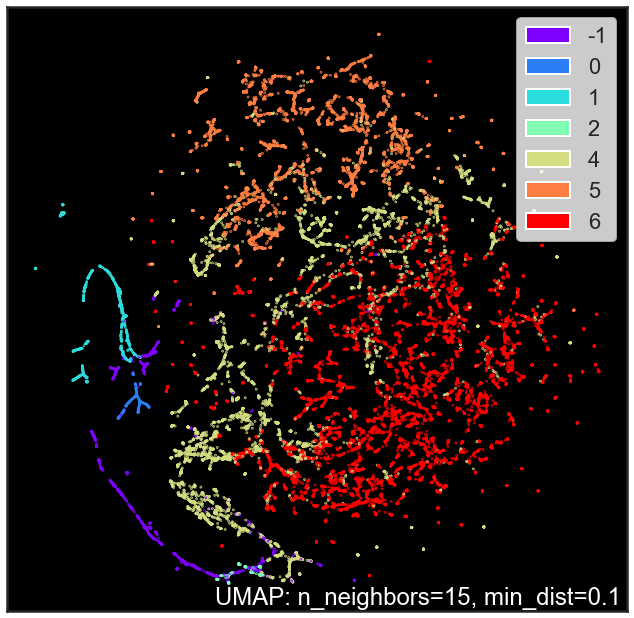

In [50]:
import umap.plot
umap.plot.points(reducer, labels=udf['cluster2'], theme='fire')

In [79]:
umap.plot.connectivity(reducer, show_points=True, theme='fire',
                       labels=udf['cluster'],edge_bundling='hammer')

C:\Users\wosnat\Anaconda3\lib\site-packages\umap\plot.py:886: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


ImportError: hammer_bundle operation requires scikit-image. Ensure you install the dependency before applying bundling.

In [53]:
udf.groupby('cluster2')['error'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster2,,,,,,,,
-1,1399.0,4600.556360,1836.183301,593.194880,3954.058649,5656.909297,5673.351046,5959.510439
0,243.0,4450.718831,619.520268,896.510412,4465.545255,4596.026178,4743.282621,4813.812158
1,1181.0,1517.274044,413.299791,722.377146,1356.411220,1357.147261,1397.554792,3366.605169
2,290.0,5694.652137,39.558969,5633.593810,5673.516534,5675.733929,5712.214771,5894.136549
4,8454.0,5659.668275,63.748772,4414.782025,5658.053022,5668.747263,5673.085314,5850.931047
5,8359.0,5657.232217,22.479144,5023.884594,5652.932172,5662.393458,5669.569055,5675.445459
6,18580.0,5669.615078,6.926193,5603.674618,5668.136952,5671.897573,5673.881857,5688.309342


In [54]:
udf.groupby(['type', 'cluster'])['run_id'].count()

type  cluster
de3   -1            43
       2             1
       3            21
de4   -1            12
       2             4
       3           447
dm    -1            26
       0             5
       1            36
pse3  -1           178
       0           106
       1           575
       3            72
pse4  -1           171
       0           132
       1           570
       3            95
se4   -1           974
       2           285
       3         34904
Name: run_id, dtype: int64

In [55]:
udf.groupby(['type', 'cluster2'])['run_id'].count()

type  cluster2
de3   -1             43
       2              1
       4             19
       5              2
de4   -1             12
       2              4
       4            149
       5            101
       6            197
dm    -1             26
       0              5
       1             36
pse3  -1            178
       0            106
       1            575
       4             19
       5             53
pse4  -1            171
       0            132
       1            570
       4             20
       5             75
se4   -1            974
       2            285
       4           8277
       5           8145
       6          18482
Name: run_id, dtype: int64

In [58]:
sorted(udf.cluster2.unique())

[-1, 0, 1, 2, 4, 5, 6]

-1


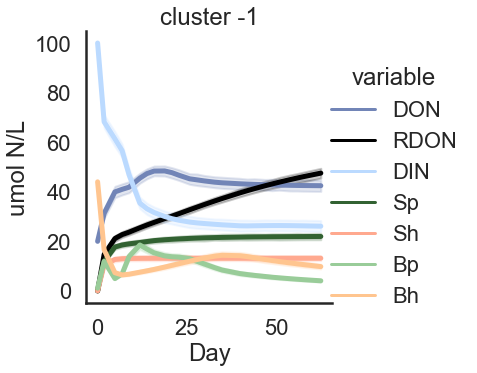

0


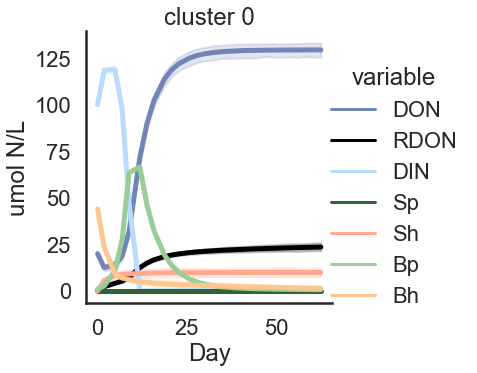

1


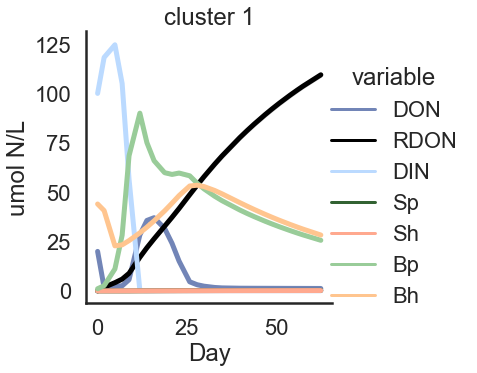

2


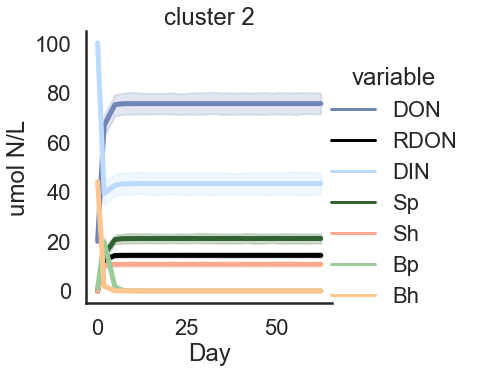

4


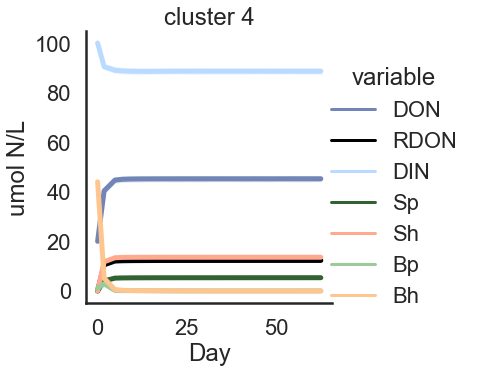

5


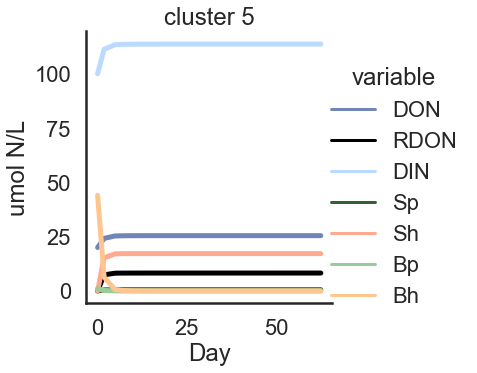

6


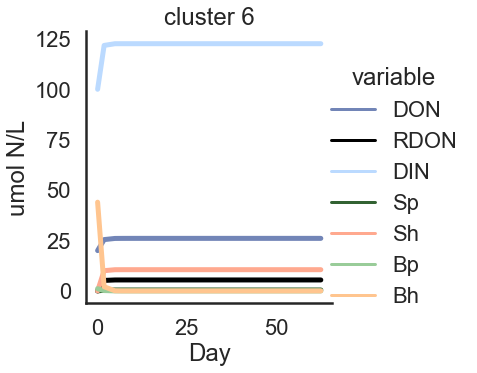

In [59]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,#ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


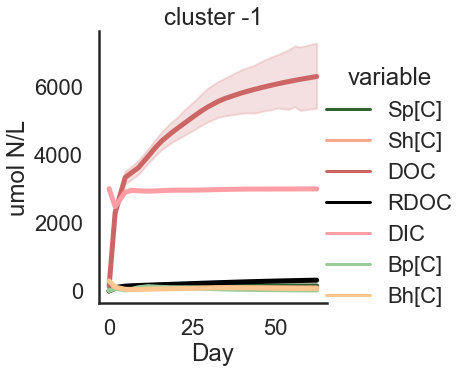

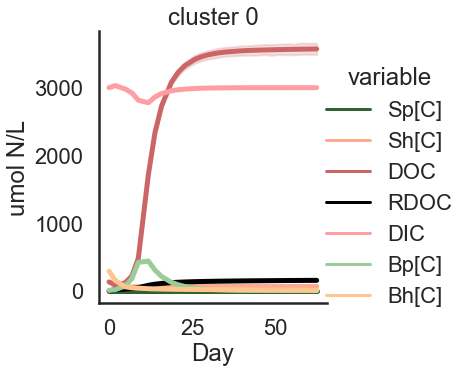

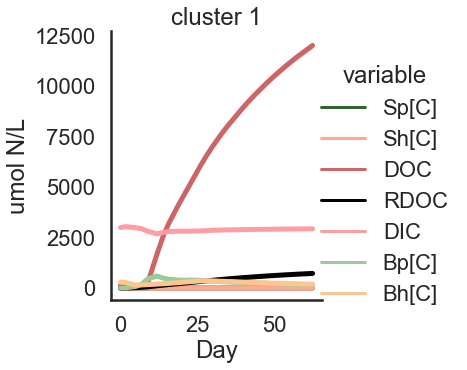

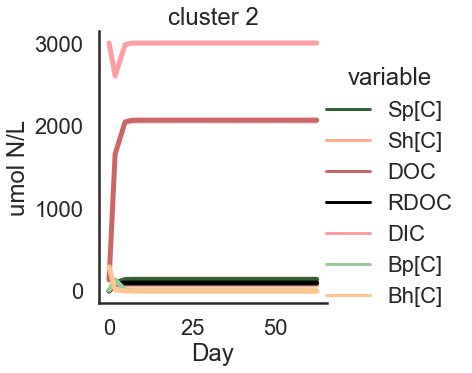

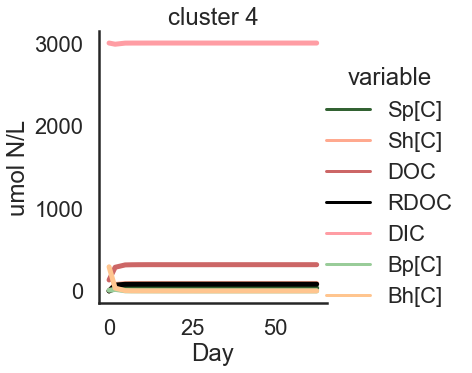

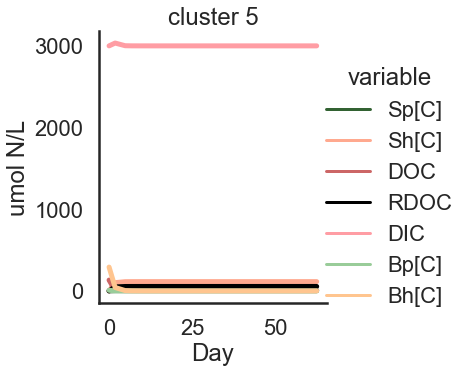

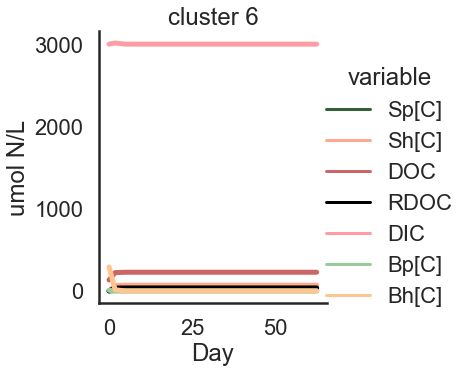

In [61]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    #ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=cccorder, palette=cccpalette, #legend=False, 
                     lw=5,#ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


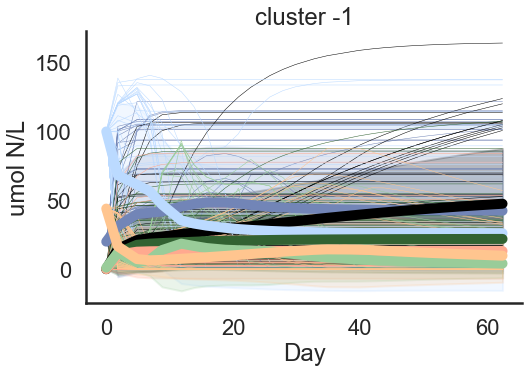

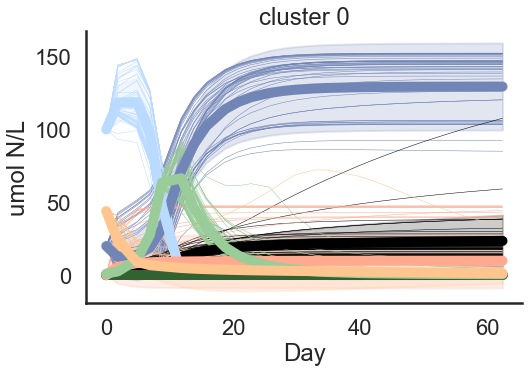

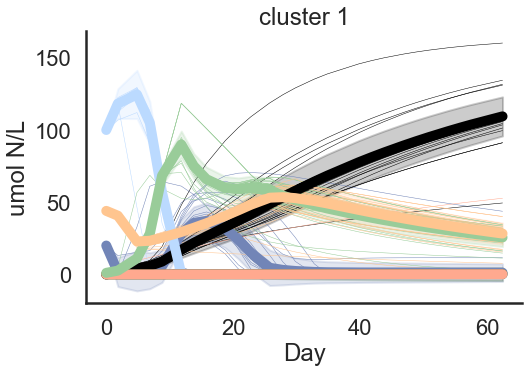

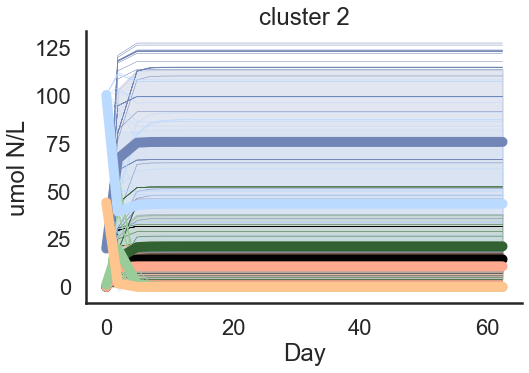

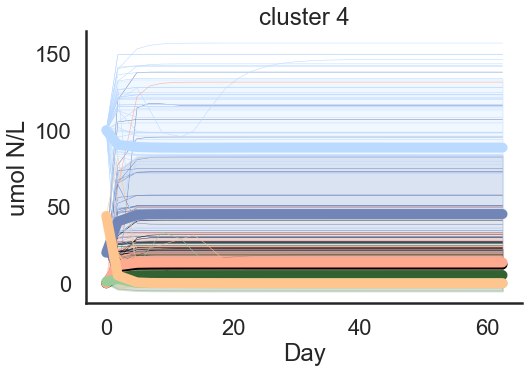

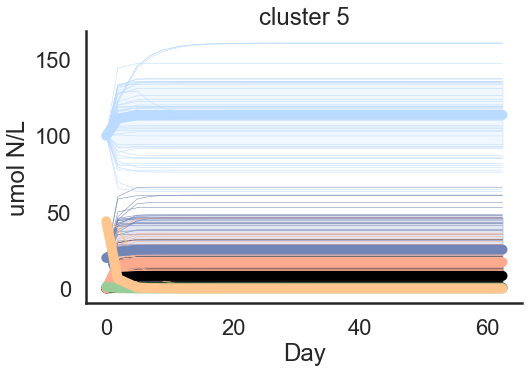

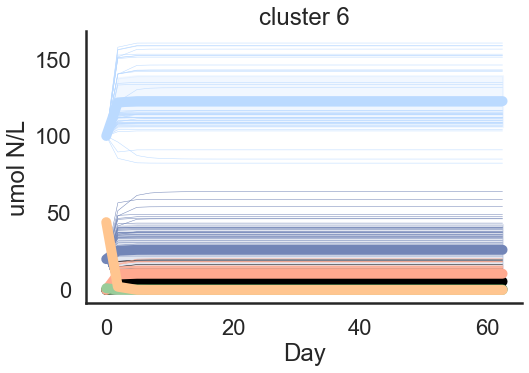

In [62]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


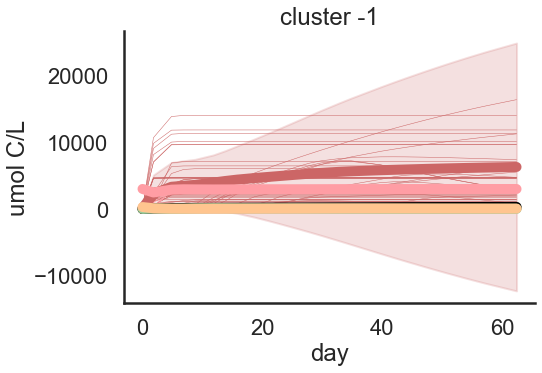

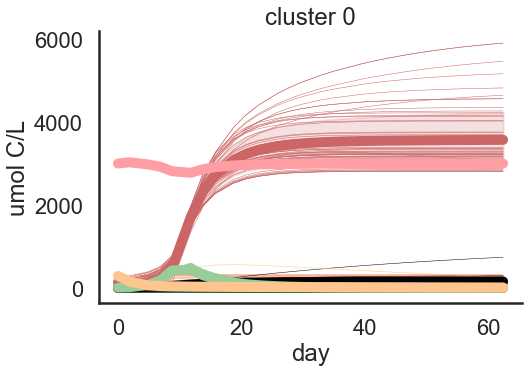

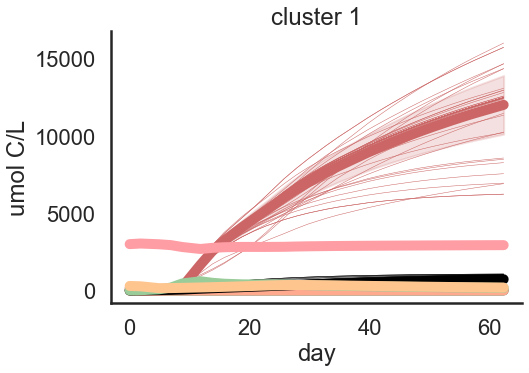

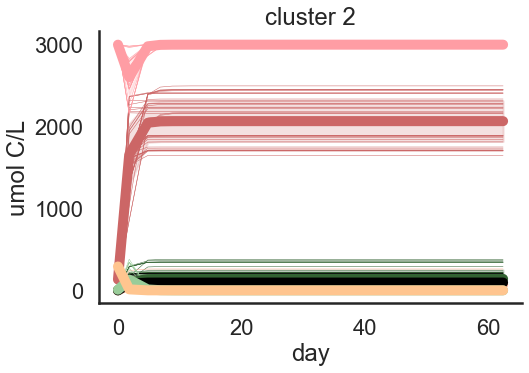

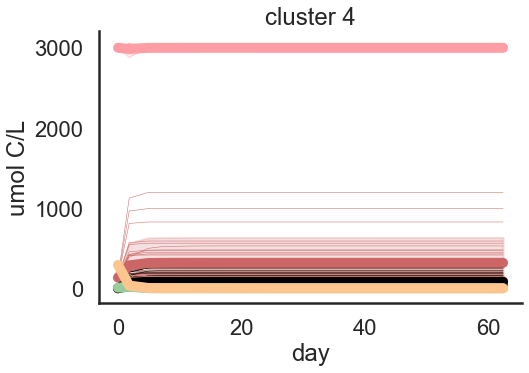

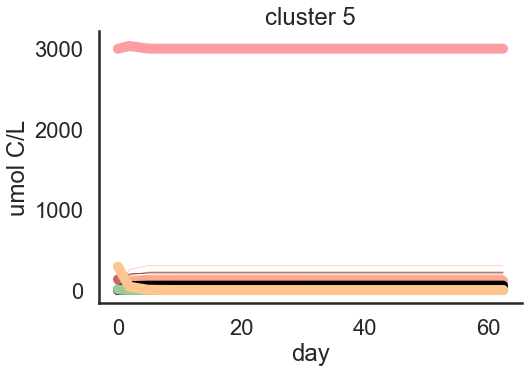

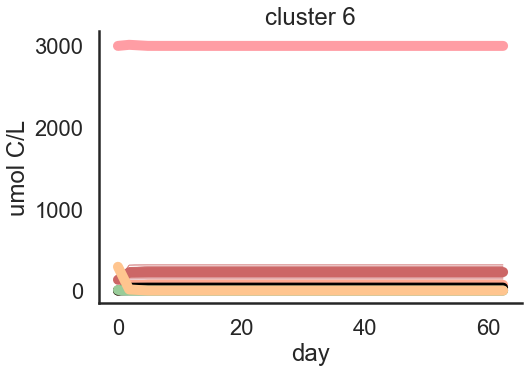

In [63]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [64]:
udf.head()

,UMAP1,UMAP2,run_id,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,...,b_h,status,h_err,p_err,error,logerror,message,type,cluster,cluster2
0,-4.184165,-2.327046,de3_h-1073436347008145156,0.0,6.542767e-07,0.000011,0.298158,0.229257,6.625,6.625,...,0.01,0.0,3986.524752,1603.049991,5589.574743,8.628658,NaN,de3,-1,-1
1,2.712182,5.393054,de3_h-1575953767854033835,0.0,1.012776e-05,0.000006,0.050485,0.527674,6.625,6.625,...,0.01,0.0,4044.634590,1610.826341,5655.460932,8.640377,NaN,de3,-1,-1
2,-4.273482,-2.162605,de3_h-1659825646723300236,0.0,9.715511e-06,0.000002,0.620677,0.419616,6.625,6.625,...,0.01,0.0,4006.401817,1606.113574,5612.515391,8.632754,NaN,de3,-1,-1
3,2.569043,9.469870,de3_h-1765083009615901515,0.0,1.008276e-05,0.000004,0.631468,0.491229,6.625,6.625,...,0.01,0.0,4030.147658,1604.830136,5634.977794,8.636748,NaN,de3,3,4
4,-4.195694,-2.308365,de3_h-2171644033102072858,0.0,1.143038e-05,0.000010,0.842866,0.587069,6.625,6.625,...,0.01,0.0,3990.094589,1604.574999,5594.669588,8.629570,NaN,de3,-1,-1


In [82]:
Xh.columns

MultiIndex([('value', 'Bp',  5.0),
            ('value', 'Bp', 12.0),
            ('value', 'Bp', 16.0),
            ('value', 'Bp', 19.0),
            ('value', 'Bp', 42.0),
            ('value', 'Bp', 62.0),
            ('value', 'Bh',  5.0),
            ('value', 'Bh', 12.0),
            ('value', 'Bh', 16.0),
            ('value', 'Bh', 19.0),
            ('value', 'Bh', 42.0),
            ('value', 'Bh', 62.0)],
           names=[None, 'variable', 'day0'])

In [100]:
udf['Bp@42'] = udf['run_id'].map(Xh[('value', 'Bp', 42.0)])
udf['Bh@42'] = udf['run_id'].map(Xh[('value', 'Bh', 42.0)])


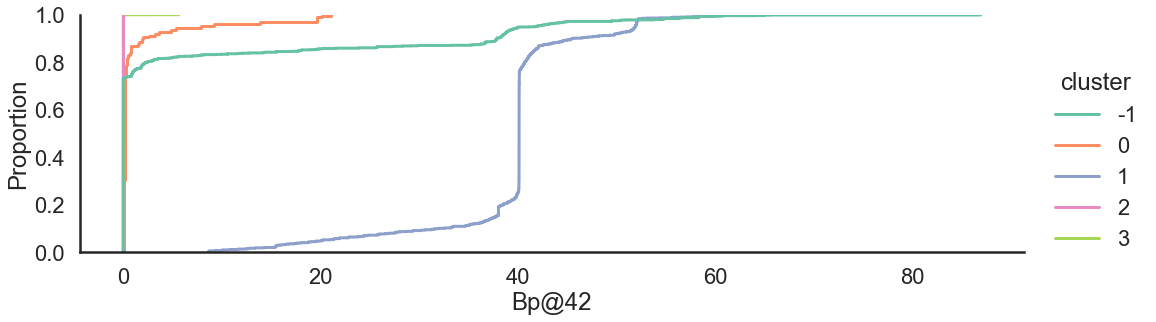

In [101]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=3, kind='ecdf')

In [110]:

mdf2 = pd.merge(mdf2, udf[['run_id', 'cluster', 'cluster2']], on='run_id', )

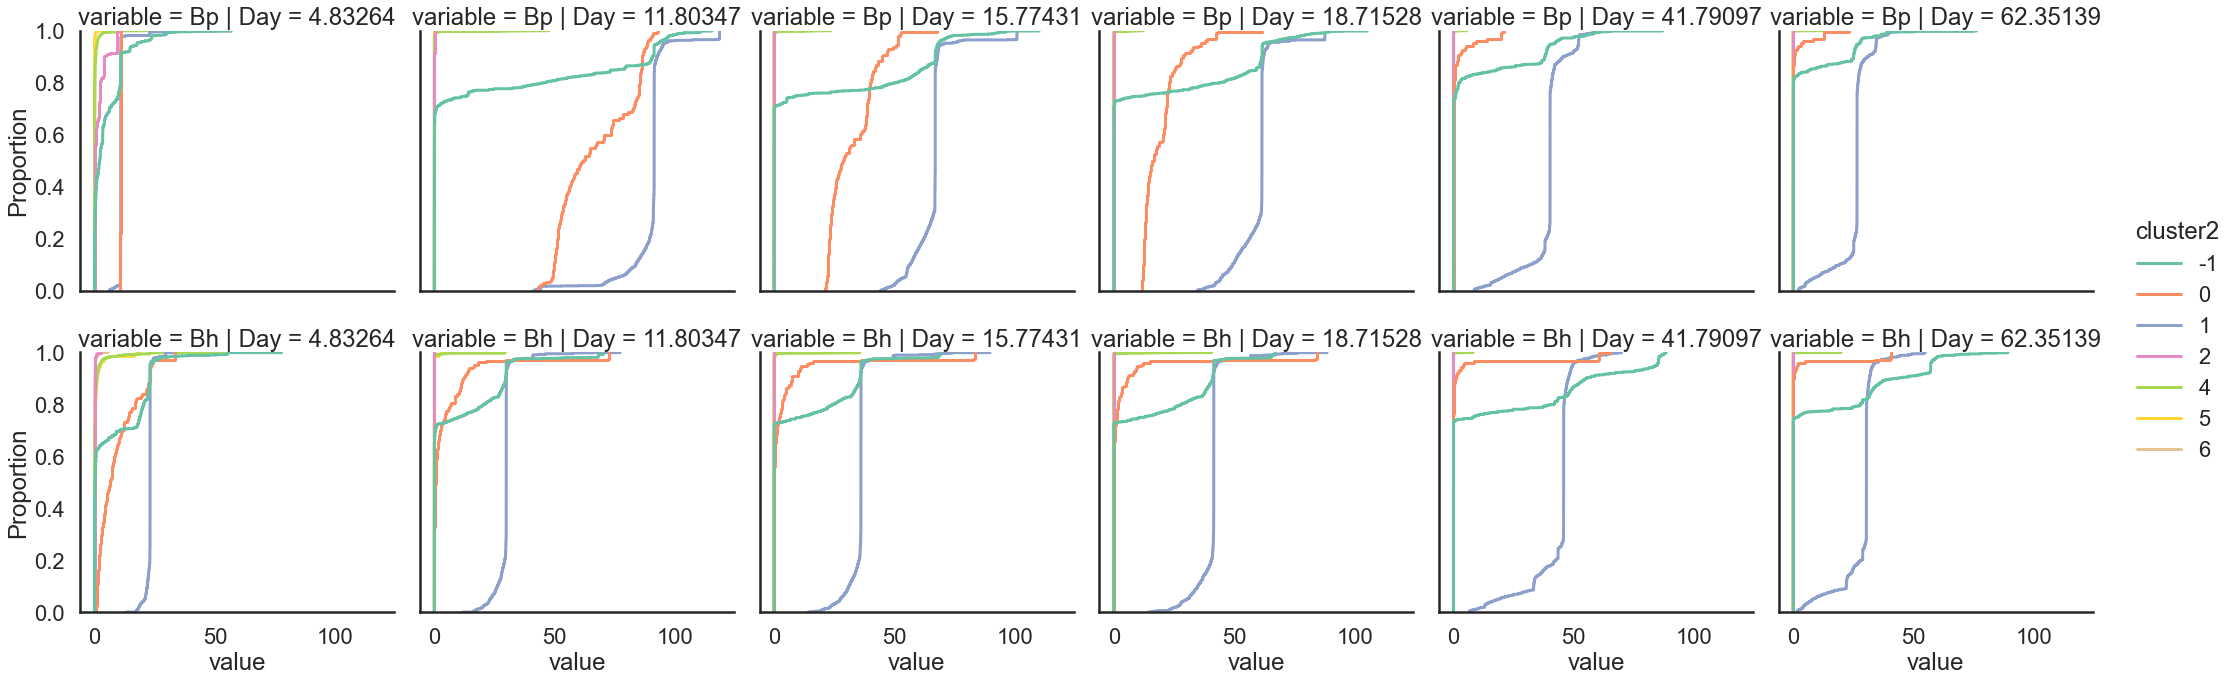

In [118]:

sns.displot(data=mdf2.loc[mdf2.Day.round(0).isin(sample_days) & mdf2.variable.isin(['Bp', 'Bh'])], 
            x='value', col='Day', palette='Set2', row='variable',
            aspect=1,
            kind='ecdf', hue='cluster2'
           )

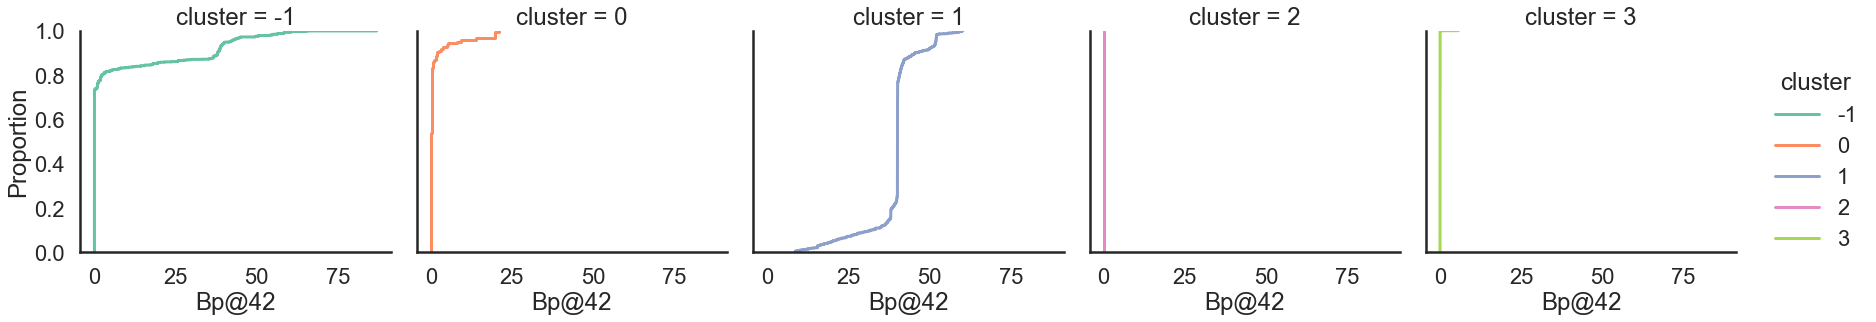

In [105]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=1,
            kind='ecdf', col='cluster'
           )

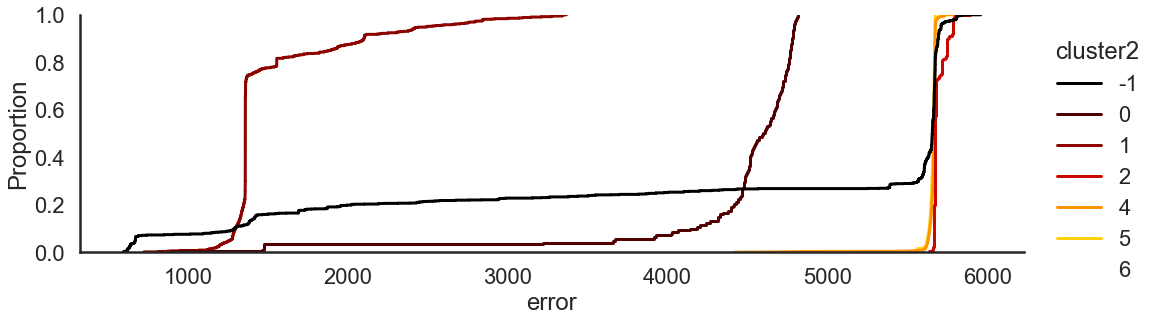

In [65]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='error', hue='cluster2', palette='fire', 
            aspect=3, kind='ecdf')

In [66]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

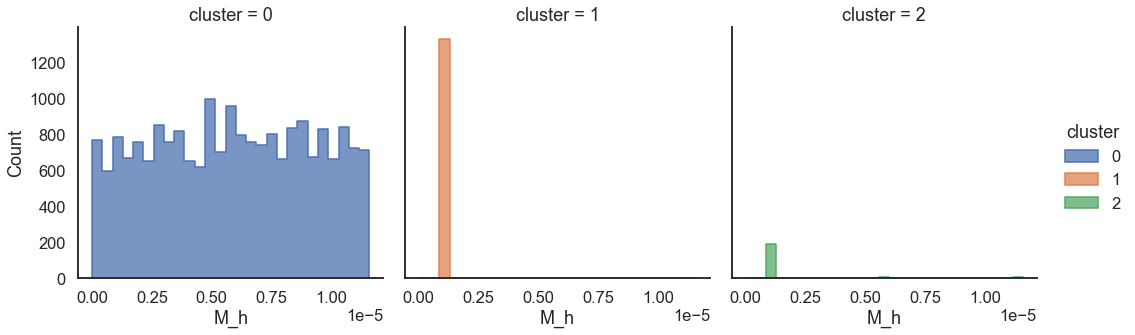

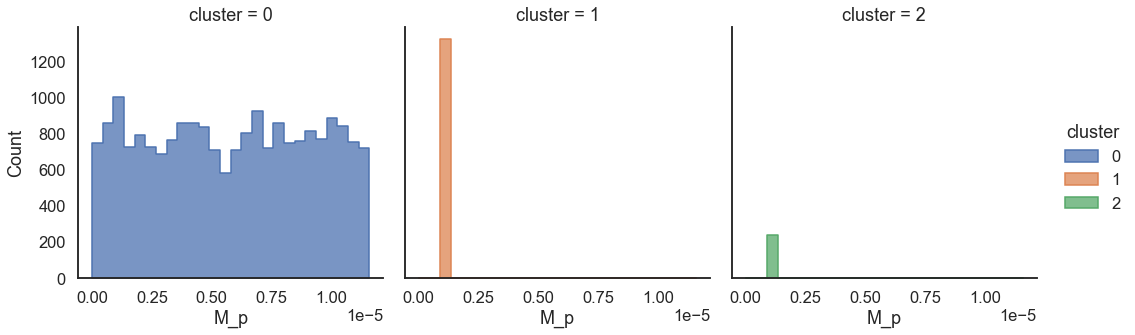

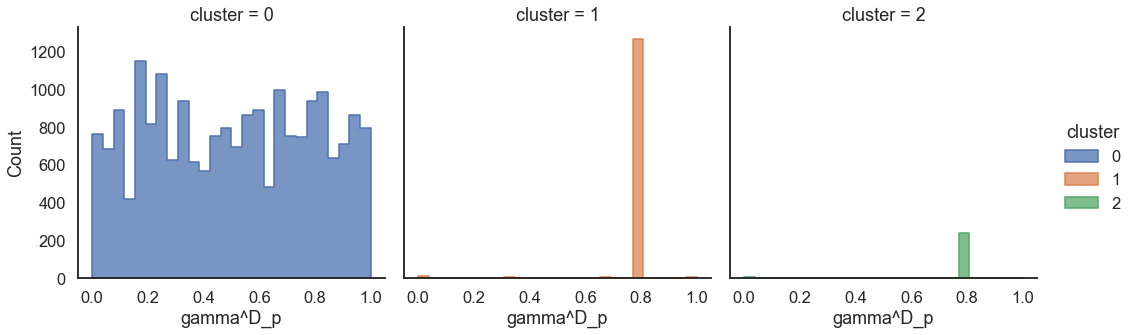

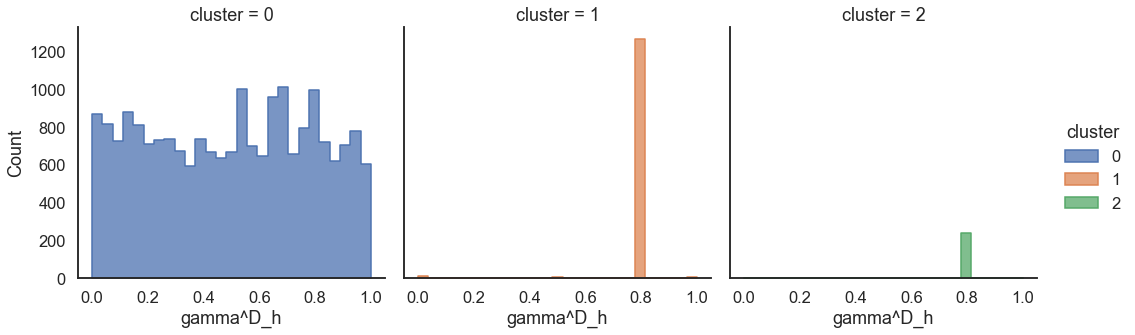

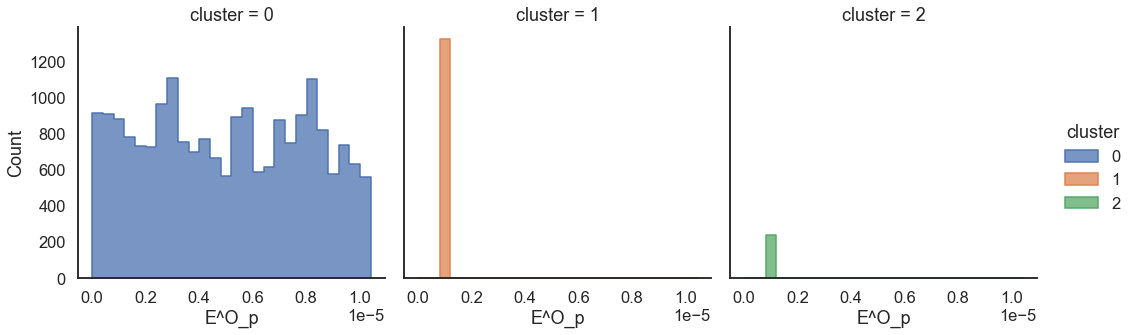

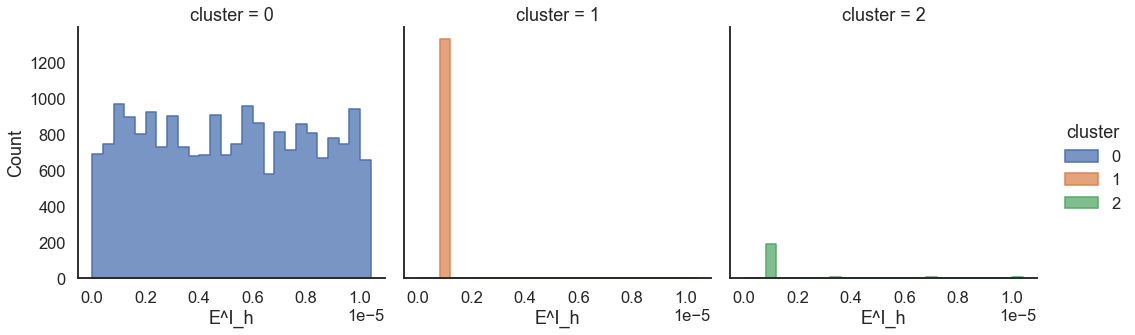

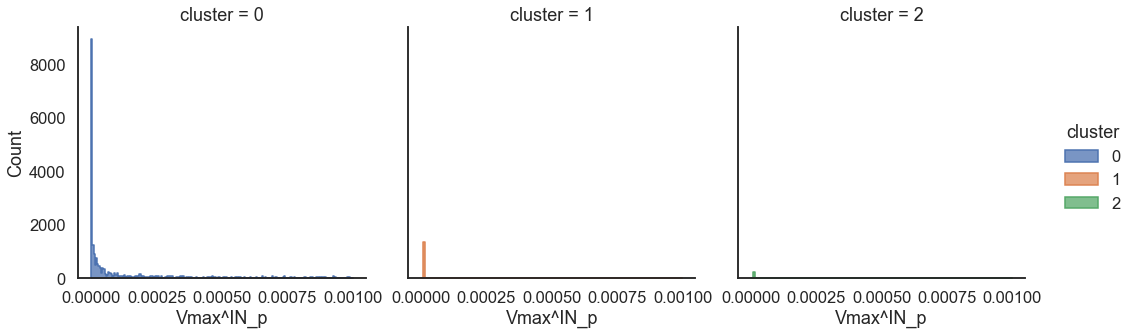

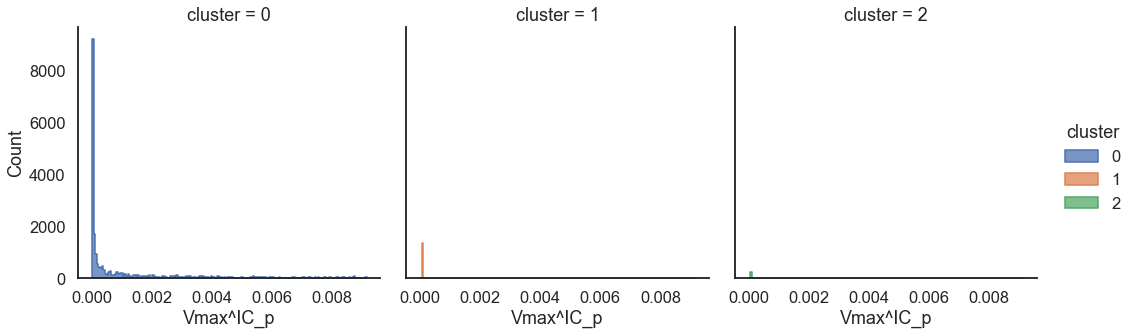

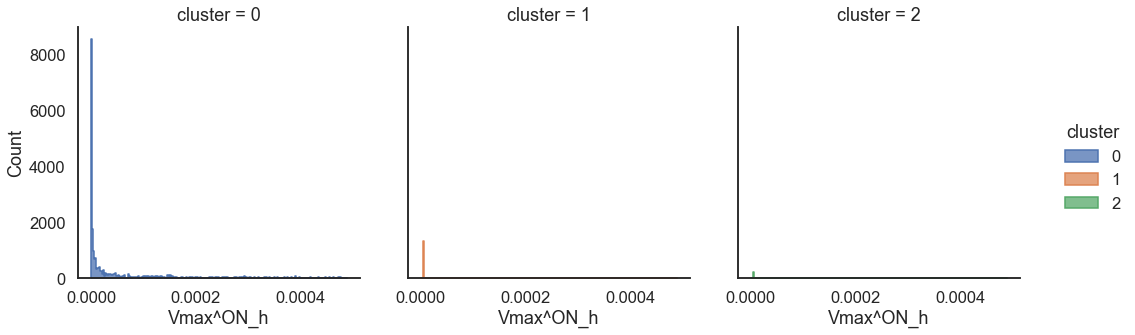

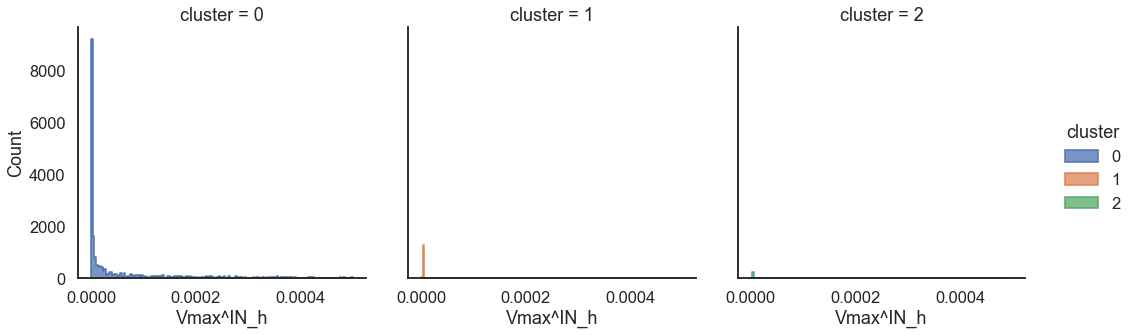

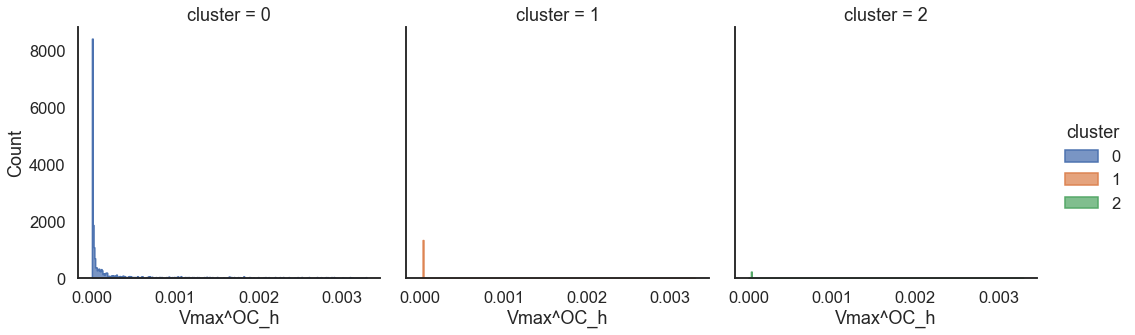

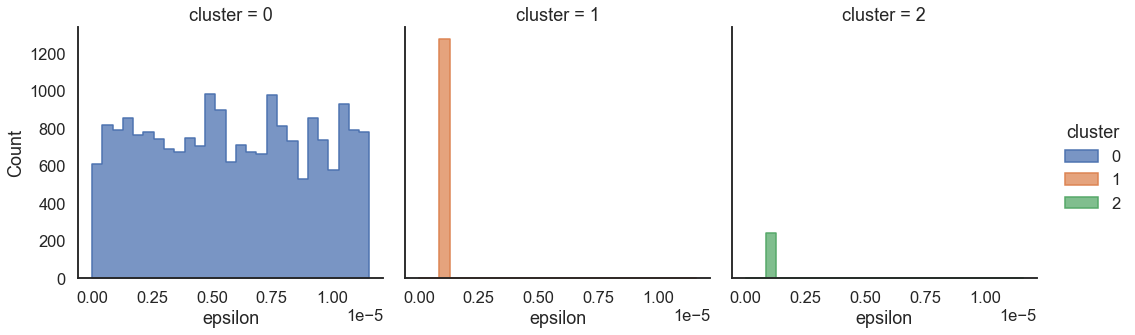

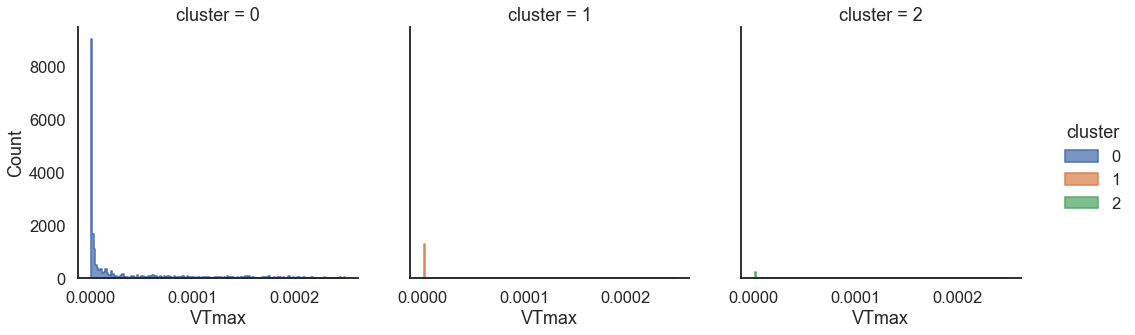

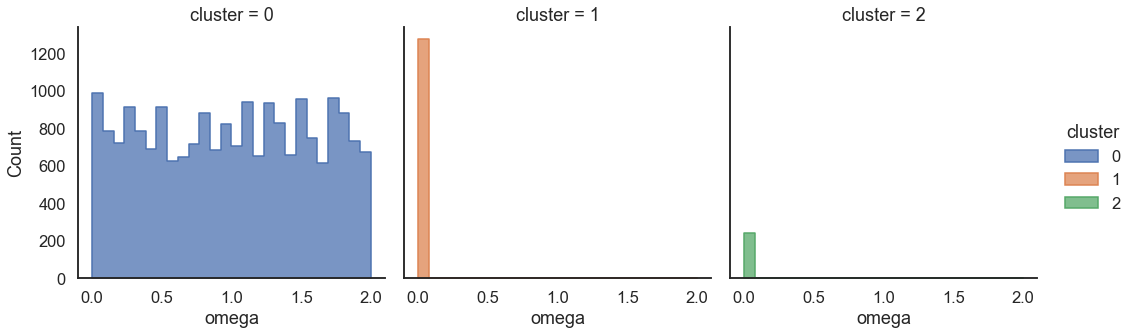

In [57]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

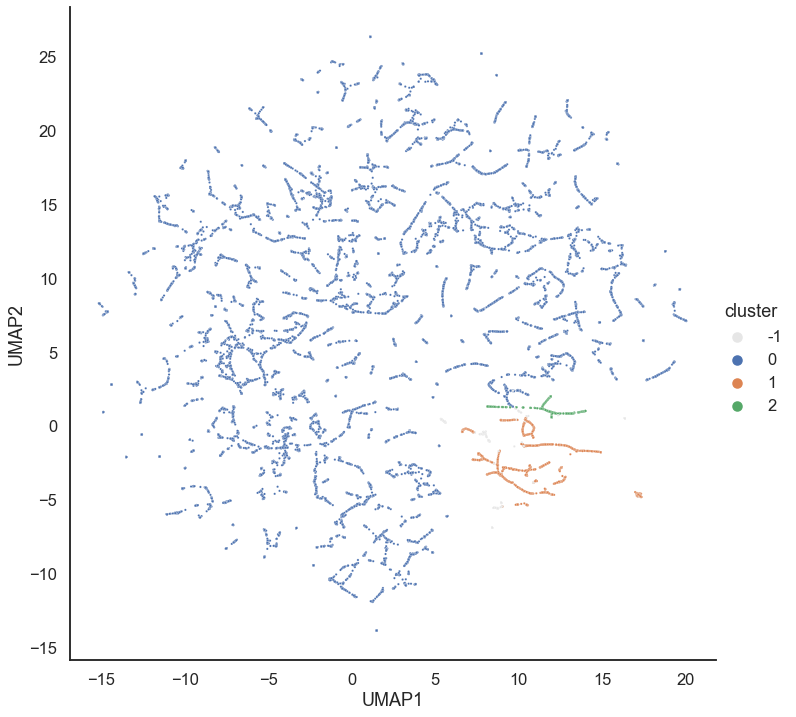

In [58]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')